In [4]:
from uitls import visualize_n_datapoints, visualize_weights, create_datapoint, create_dataset, show_two_images_side_by_side
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime, os
import matplotlib.image as mpimg
from livelossplot import PlotLossesKeras

# 1. Create a Dataset

This step is the most time consuming and critical in most AI Projects --> can take months or years and cost fortunes

In this toy project it is done in <1 sec with a few lines of code :-D 

In [5]:
train_examples,train_labels=create_dataset(1000)
test_examples,test_labels=create_dataset(300)

### visualize an random example of the data set

quick reminder 

![alt text](images\categories.png "Title" )

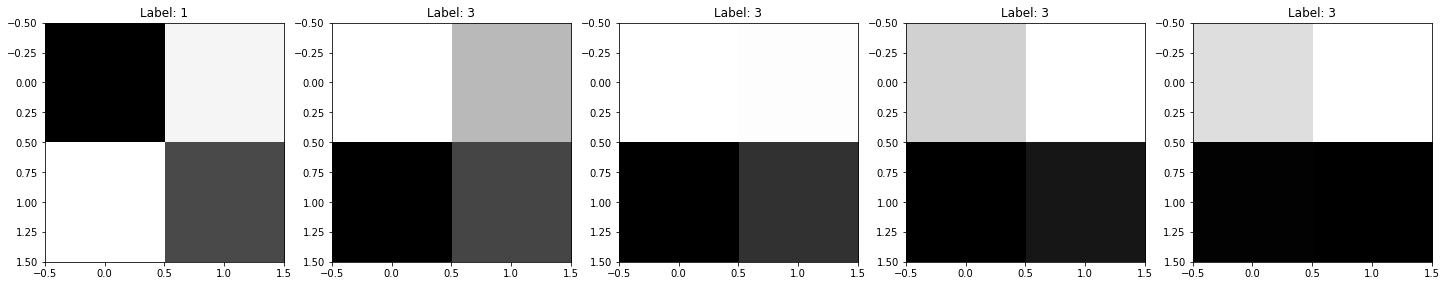

In [6]:
random_start_point=np.random.randint(0,955)
visualize_n_datapoints(train_examples[random_start_point:random_start_point+5],train_labels[random_start_point:random_start_point+5])

### prepare the data to be processesed

In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, tf.one_hot(train_labels, depth=3)))
test_dataset  = tf.data.Dataset.from_tensor_slices((test_examples, tf.one_hot(test_labels, depth=3))) 

#https://www.tensorflow.org/tutorials/load_data/numpy#shuffle_and_batch_the_datasets
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# 2.Create the model
 quick reminder of what we want to build
 
![alt text](images\neural_net.png "Title" )

In [9]:
################################ this is the magic part ################################
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(3)
])
#########################################################################################

model.compile(optimizer="Adam", loss="mse", metrics=["accuracy"])

#### visualize the UNTRAINED neural net

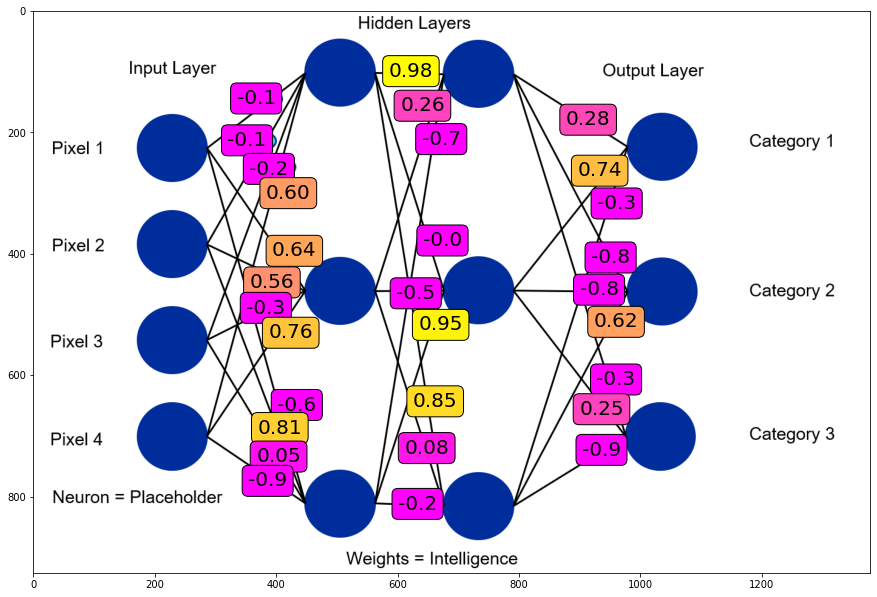

In [10]:
visualize_weights(model, "images\\neural_net_large.png",save_image=True, result_image_name="untrained_weights.png")


#### Let the UNTRAINED neural net do predictions --> just jibberish

1/1 [==============================] - 0s 13ms/step


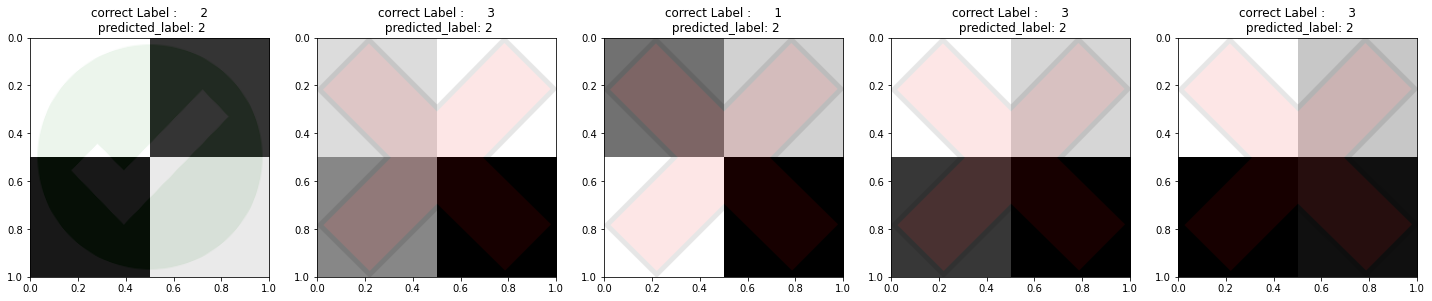

In [11]:
pixels,labels = create_dataset(5)
visualize_n_datapoints(pixels,labels,model=model,predicted_labels_desired=True)

# 3. Train the Model !!!
1000 epochs x 1000 datapoints = 1.000.000 iterations

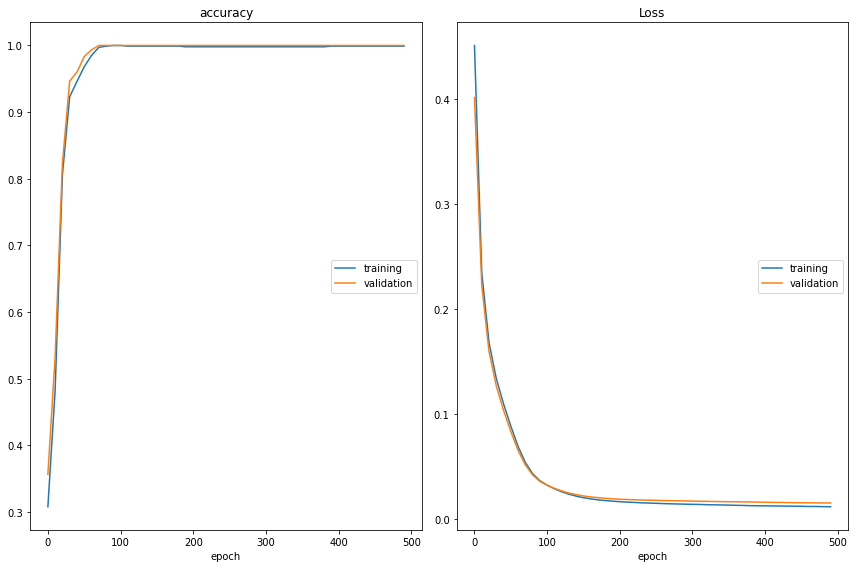

accuracy
	training         	 (min:    0.308, max:    1.000, cur:    0.999)
	validation       	 (min:    0.357, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.012, max:    0.451, cur:    0.012)
	validation       	 (min:    0.015, max:    0.401, cur:    0.015)


In [12]:
model.fit(train_dataset, epochs=500, validation_data = (test_dataset), callbacks=[PlotLossesKeras()], verbose=0)

#### visualize the TRAINED neural net

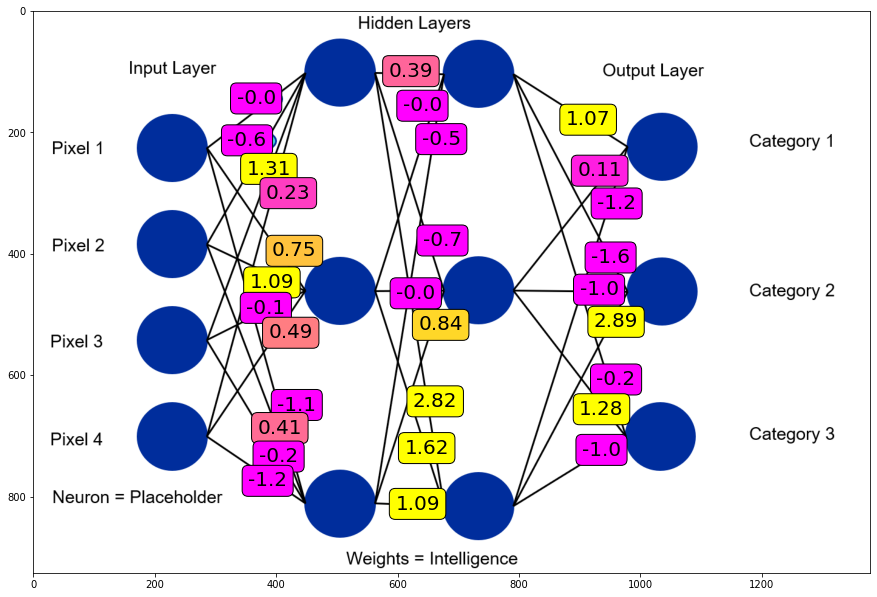

In [13]:
visualize_weights(model, "images\\neural_net_large.png",save_image=True, result_image_name="trained_weights.png")

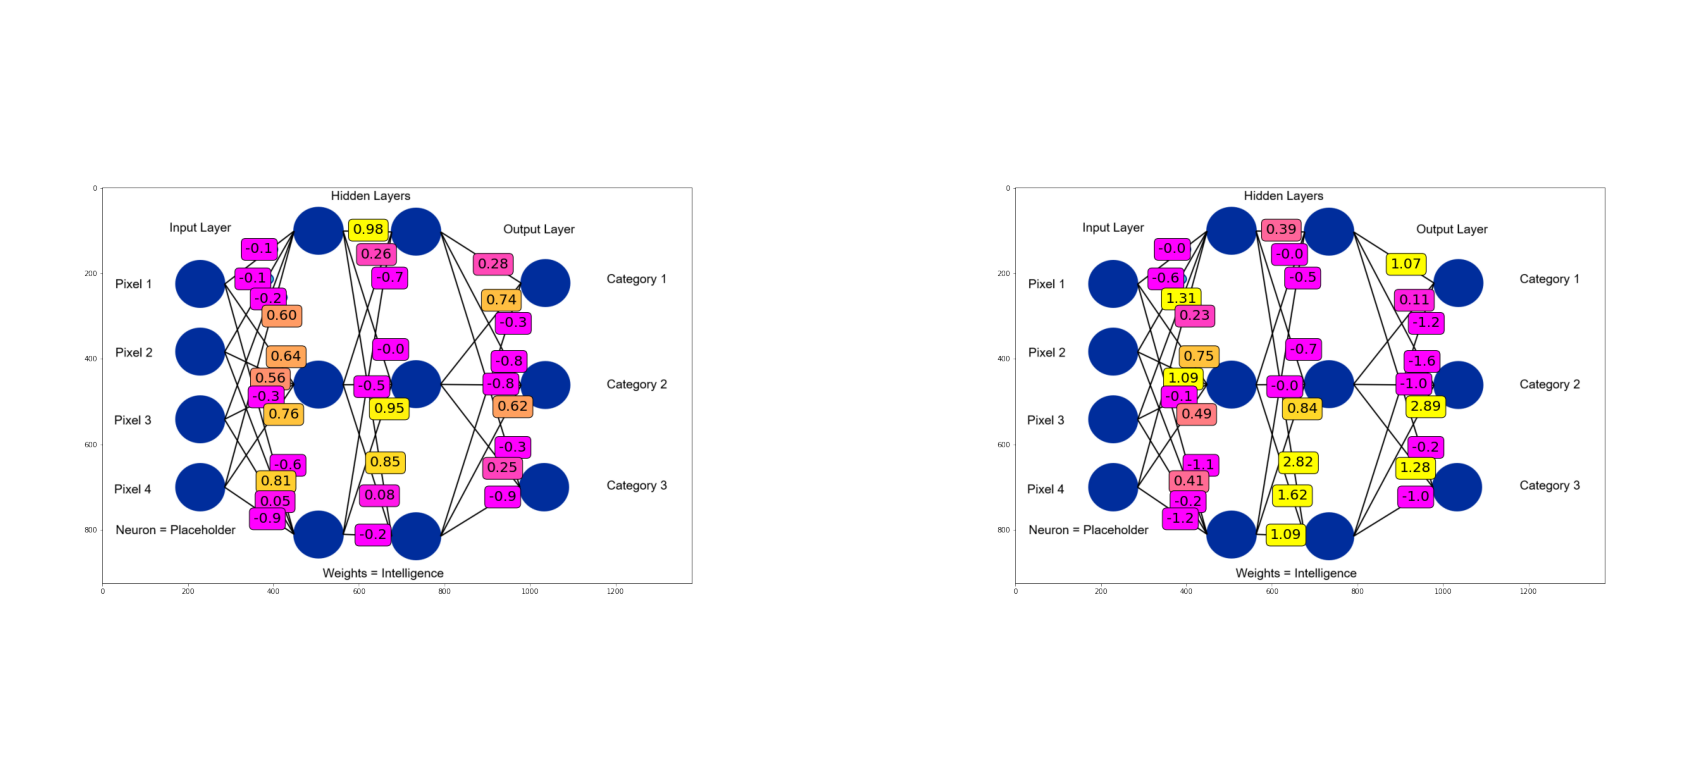

In [14]:
show_two_images_side_by_side("images\\untrained_weights.png","images\\trained_weights.png") # WTF is going on here? --> Fix this

#### Let the TRAINED neural net do predictions --> Wohooo! We created Intelligence!

1/1 [==============================] - 0s 14ms/step


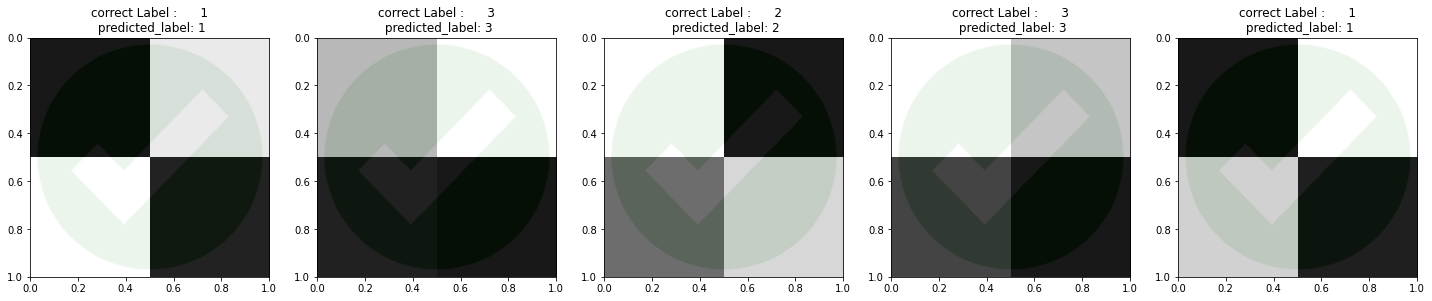

In [15]:
pixels,labels = create_dataset(5)
visualize_n_datapoints(pixels,labels,model=model,predicted_labels_desired=True)

#### save the trained model to file

In [30]:
# save model to file
model.save('awesome_model.h5')

# 4. Deploy model to production :-P



this is a topic for another talk





### Appendix

...

...

...

...

...

...

...


...

...

...

don`t go further. This is the end of the safe area


...


...

...


In [ ]:
# create a datapoint do a prediction and visualize it
pixels, label = create_datapoint()
visualize_datapoint(pixels, label)
model.predict(np.array([pixels]),1)

In [ ]:
def visualize_single_datapoint(pixels:np.ndarray, label: int):
    # visualize datapoint
    plt.figure()
    plt.imshow(pixels.reshape(2,2, order='C'), cmap='gray_r')
    plt.show()
    plt.title('Label: {}'.format(label))

pixels, label = create_datapoint()
print(pixels)
print(pixels.reshape(2,2, order='C'))
visualize_single_datapoint(pixels, label)

In [ ]:
pixels1, label1 = create_datapoint()
pixels2, label2 = create_datapoint()

plt.figure(1)

plt.subplot(121)
plt.imshow(pixels1.reshape(2,2, order='C'), cmap='gray_r')
plt.title('Label: {}'.format(label1))

plt.subplot(122)
plt.imshow(pixels2.reshape(2,2, order='C'), cmap='gray_r')
plt.title('Label: {}'.format(label2))


plt.show()

In [ ]:
def visualize_n_random_datapoint(n:int):
    """
    visualize n random datapoints
    """
    plt.figure(1, figsize=(30, 30))
    for i in range(1,n):
        pixels, label = create_datapoint()
        plt.subplot(1,n,i)
        plt.imshow(pixels.reshape(2,2, order='C'), cmap='gray_r')
        plt.title('Label: {}'.format(label))
    plt.show()

In [ ]:
pixels,labels = create_dataset(5)
visualize_n_datapoints(pixels,labels)

In [ ]:
from xmlrpc.client import boolean

def visualize_n_datapoints(pixels_array:np.array, labels:list, model=[] ,predicted_labels_desired:boolean=False):
    """
    visualize n datapoints by getting the predictions from the model and comparing them to the labels.
    The result is visualized in a table with the predicted labels and the actual labels

    Args:
        pixels_array (np.array): _description_
        labels (list): _description_
        model (list, optional): The current model. Defaults to [].
        predicted_labels_desired (boolean, optional): wether a prediction should be. Defaults to False.
    """
    green_check=mpimg.imread('green_check.png')
    red_cross=mpimg.imread('red_cross.png')
    
    plt.figure(1, figsize=(30, 30))
    for i in range(0,len(pixels_array)):
        pixels = pixels_array[i] 
        label = labels[i]
        plt.subplot(1,len(pixels_array)+1,i+1)
        plt.imshow(pixels.reshape(2,2, order='C'), cmap='gray_r')
        # add green check or red cross
        if predicted_labels_desired:
            predicted_label = model.predict(np.array([pixels]),1)
            if predicted_label.argmax() == label:
                plt.imshow(green_check, extent=[0,1,0,1], alpha=0.1)  
            else:
                plt.imshow(red_cross, extent=[0,1,0,1], alpha=0.1)  
            plt.title('correct Label:      '+str(label)+'\n predicted_label: '+str(np.argmax(predicted_label)))
        else:
            plt.title('Label: {}'.format(label))
    plt.show()

In [ ]:
number_of_datapoints=5
random_start_point=int(np.random.random()*100)
pixels_array=test_examples[random_start_point:random_start_point+number_of_datapoints]
labels=test_labels[random_start_point:random_start_point+number_of_datapoints]
visualize_n_datapoints(pixels_array, labels, predicted_labels_desired=True, model=model)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 60 ,80

# read images
img_A = mpimg.imread("images\\untrained_weights.png")
img_B = mpimg.imread("images\\trained_weights.png")

# display images
fig, ax = plt.subplots(1,2)
# turn of the axis
# ax[0].axis('off')
# ax[1].axis('off')
ax[0].imshow(img_A)
ax[1].imshow(img_B)

In [ ]:
# display two images side by side
def display_two_images(image1,image2):
    fig, ax = plt.subplots(1, 2, figsize=(60, 80))
    ax[0].axis('off')
    ax[1].axis('off')   
    ax[0].imshow(image1)
    ax[1].imshow(image2)
    plt.show()
display_two_images(mpimg.imread("images\\untrained_weights.png"),mpimg.imread("images\\trained_weights.png"))